In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

### Loading and preparing the dataset

#### Load the dataset

In [2]:
DATA_DIRECTORY = "/home/fehrdelt/data_ssd/data/clinical_data/Full/"

In [3]:
X_volumes_clinical = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,31))
X_volumes_clinical.head()

supratentorial_IPH  supratentorial_SAH  supratentorial_Petechiae  \
0                   0                 342                         0   
1                   0                   0                         0   
2                   0                 101                         0   
3                   0                 328                         0   
4                   0                   9                         0   

   supratentorial_Edema  infratentorial_IPH  infratentorial_SAH  \
0                     0                   0                  15   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                    15                   0                   0   

   infratentorial_Petechiae  infratentorial_Edema  brainstem_IPH  \
0                         0                     0              0   
1                         0                     0              0   
2                         0                     0              0   
3                         0                     0              0   
4                         0                     0              0   

   brainstem_SAH  ...  pression_arterielle_diastolique_PAD_arrivee_du_smur  \
0              0  ...                                               49.0     
1              0  ...                                               60.0     
2              0  ...                                               64.0     
3              0  ...                                               71.0     
4              0  ...                                               79.0     

   score_glasgow_initial  score_glasgow_moteur_initial  \
0                   15.0                           6.0   
1                   15.0                           6.0   
2                   14.0                           6.0   
3                   15.0                           6.0   
4                    NaN                           NaN   

   anomalie_pupillaire_prehospitalier  frequence_cardiaque_FC_arrivee_du_smur  \
0                                 0.0                                    56.0   
1                                 0.0                                   100.0   
2                                 0.0                                   120.0   
3                                 0.0                                   107.0   
4                                 0.0                                    83.0   

   arret_cardio_respiratoire_massage  penetrant_objet  ischemie_du_membre  \
0                                0.0              0.0                 0.0   
1                                0.0              0.0                 0.0   
2                                0.0              0.0                 0.0   
3                                0.0              0.0                 0.0   
4                                0.0              0.0                 0.0   

   hemorragie_externe  amputation  
0                 0.0         0.0  
1                 0.0         0.0  
2                 0.0         0.0  
3                 0.0         0.0  
4                 0.0         0.0  

[5 rows x 29 columns]

In [4]:
X_volumes_clinical_with_outcome = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,32))
X_volumes_clinical_with_outcome.head()

supratentorial_IPH  supratentorial_SAH  supratentorial_Petechiae  \
0                   0                 342                         0   
1                   0                   0                         0   
2                   0                 101                         0   
3                   0                 328                         0   
4                   0                   9                         0   

   supratentorial_Edema  infratentorial_IPH  infratentorial_SAH  \
0                     0                   0                  15   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                    15                   0                   0   

   infratentorial_Petechiae  infratentorial_Edema  brainstem_IPH  \
0                         0                     0              0   
1                         0                     0              0   
2                         0                     0              0   
3                         0                     0              0   
4                         0                     0              0   

   brainstem_SAH  ...  score_glasgow_initial  score_glasgow_moteur_initial  \
0              0  ...                   15.0                           6.0   
1              0  ...                   15.0                           6.0   
2              0  ...                   14.0                           6.0   
3              0  ...                   15.0                           6.0   
4              0  ...                    NaN                           NaN   

   anomalie_pupillaire_prehospitalier  frequence_cardiaque_FC_arrivee_du_smur  \
0                                 0.0                                    56.0   
1                                 0.0                                   100.0   
2                                 0.0                                   120.0   
3                                 0.0                                   107.0   
4                                 0.0                                    83.0   

   arret_cardio_respiratoire_massage  penetrant_objet  ischemie_du_membre  \
0                                0.0              0.0                 0.0   
1                                0.0              0.0                 0.0   
2                                0.0              0.0                 0.0   
3                                0.0              0.0                 0.0   
4                                0.0              0.0                 0.0   

   hemorragie_externe  amputation  outcome_neurochir_pic  
0                 0.0         0.0                    0.0  
1                 0.0         0.0                    0.0  
2                 0.0         0.0                    0.0  
3                 0.0         0.0                    0.0  
4                 0.0         0.0                    0.0  

[5 rows x 30 columns]

In [5]:
X_clinical_only = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(16,31))
X_clinical_only.head()

age  hemocue_initial  fracas_du_bassin  catecholamines  \
0  52.0              NaN               0.0             0.0   
1  23.0              NaN               0.0             0.0   
2  42.0             13.1               0.0             0.0   
3  34.0             15.8               0.0             0.0   
4  22.0              NaN               0.0             0.0   

   pression_arterielle_systolique_PAS_arrivee_du_smur  \
0                                               87.0    
1                                              100.0    
2                                              101.0    
3                                              110.0    
4                                              114.0    

   pression_arterielle_diastolique_PAD_arrivee_du_smur  score_glasgow_initial  \
0                                               49.0                     15.0   
1                                               60.0                     15.0   
2                                               64.0                     14.0   
3                                               71.0                     15.0   
4                                               79.0                      NaN   

   score_glasgow_moteur_initial  anomalie_pupillaire_prehospitalier  \
0                           6.0                                 0.0   
1                           6.0                                 0.0   
2                           6.0                                 0.0   
3                           6.0                                 0.0   
4                           NaN                                 0.0   

   frequence_cardiaque_FC_arrivee_du_smur  arret_cardio_respiratoire_massage  \
0                                    56.0                                0.0   
1                                   100.0                                0.0   
2                                   120.0                                0.0   
3                                   107.0                                0.0   
4                                    83.0                                0.0   

   penetrant_objet  ischemie_du_membre  hemorragie_externe  amputation  
0              0.0                 0.0                 0.0         0.0  
1              0.0                 0.0                 0.0         0.0  
2              0.0                 0.0                 0.0         0.0  
3              0.0                 0.0                 0.0         0.0  
4              0.0                 0.0                 0.0         0.0

In [6]:
X_volumes_only = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=range(2,16))
X_volumes_only.head()

supratentorial_IPH  supratentorial_SAH  supratentorial_Petechiae  \
0                   0                 342                         0   
1                   0                   0                         0   
2                   0                 101                         0   
3                   0                 328                         0   
4                   0                   9                         0   

   supratentorial_Edema  infratentorial_IPH  infratentorial_SAH  \
0                     0                   0                  15   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                    15                   0                   0   

   infratentorial_Petechiae  infratentorial_Edema  brainstem_IPH  \
0                         0                     0              0   
1                         0                     0              0   
2                         0                     0              0   
3                         0                     0              0   
4                         0                     0              0   

   brainstem_SAH  brainstem_Petechiae  brainstem_Edema  SDH    EDH  
0              0                    0                0   43      0  
1              0                    0                0  312  11685  
2              0                    0                0   11      0  
3              0                    0                0  796      0  
4              0                    0                0  253      0

In [7]:
y = pd.read_csv(DATA_DIRECTORY+"combined_clinical_data_volumes_outcome_TTS_ANTS_hist_match.csv", usecols=[31])
y.head()

outcome_neurochir_pic
0                    0.0
1                    0.0
2                    0.0
3                    0.0
4                    0.0

#### Drop samples where there is no outcome information

In [8]:
nan_indexes = y.loc[pd.isna(y["outcome_neurochir_pic"]), :].index # indexes where there is a nan value.
print(nan_indexes)

y = y.dropna()
X_volumes_clinical = X_volumes_clinical.drop(nan_indexes)
X_volumes_clinical_with_outcome = X_volumes_clinical_with_outcome.drop(nan_indexes)
X_clinical_only = X_clinical_only.drop(nan_indexes)
X_volumes_only = X_volumes_only.drop(nan_indexes)

Index([76, 102, 104, 113, 118, 125], dtype='int64')


In [9]:
y = y['outcome_neurochir_pic'].to_numpy()
y = [int(i) for i in y]

### Correlation matrix

<Axes: title={'center': 'Absolute value of correlation between features'}>

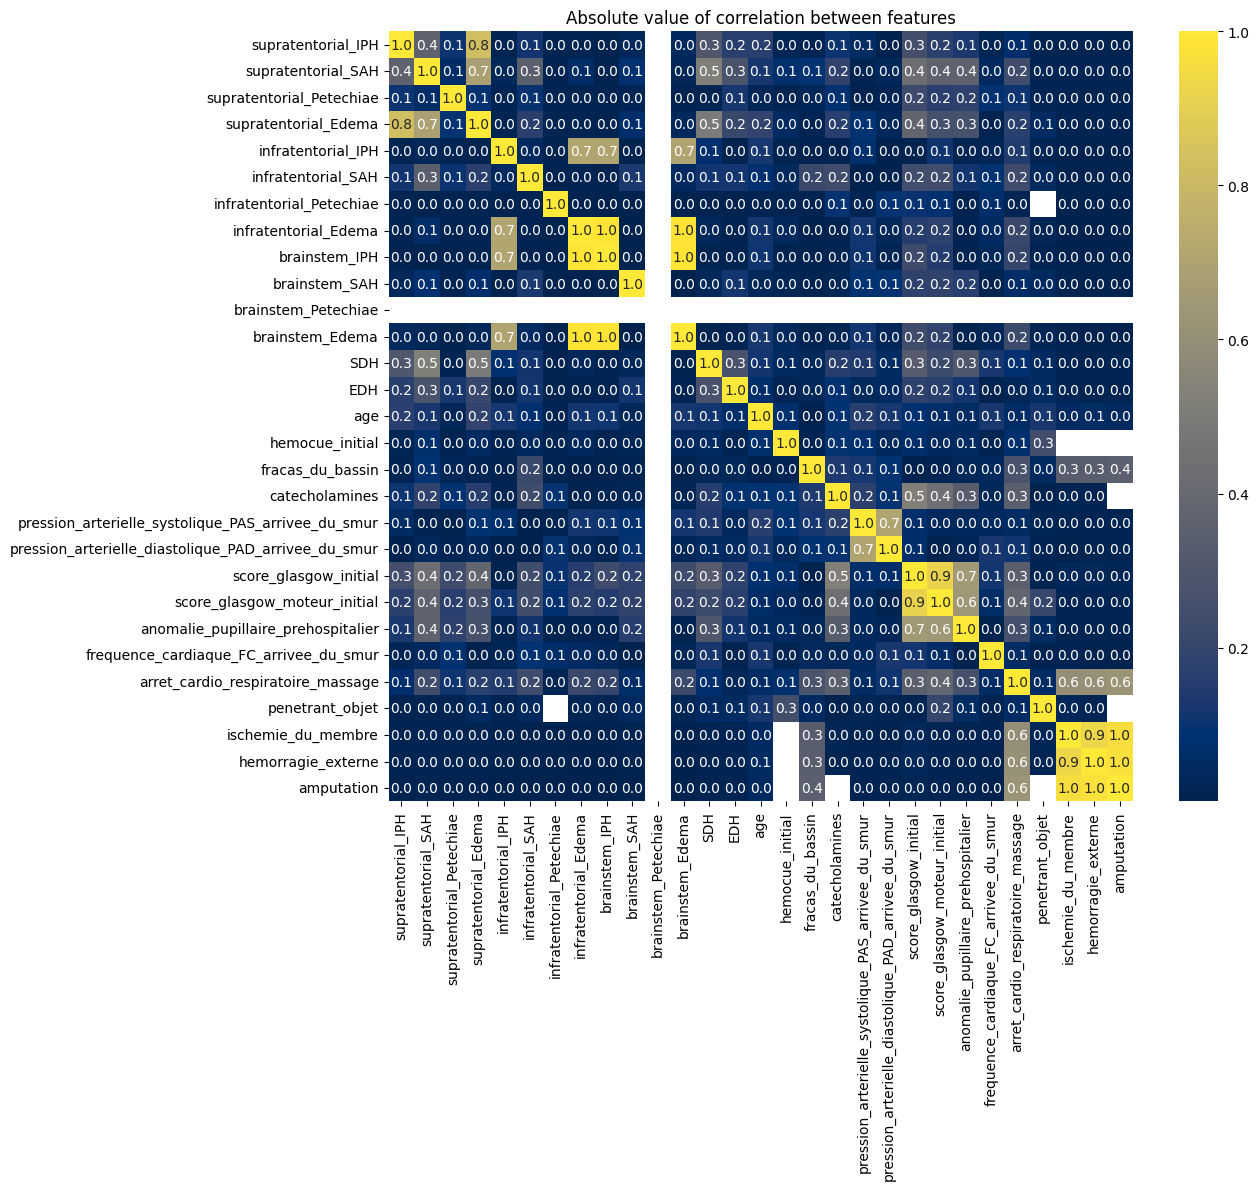

In [10]:
plt.subplots(figsize=(12,10))
plt.title("Absolute value of correlation between features")
sns.heatmap(X_volumes_clinical.corr().map(np.abs), cmap="cividis",annot=True,fmt=".1f")  

### Pairplot

In [11]:
g = sns.PairGrid(X_volumes_clinical_with_outcome, hue="outcome_neurochir_pic")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Correlation with outcome

In [37]:
# Calculating the correlation of column A against all others
corr_with_outcome = X_volumes_clinical_with_outcome.corr()['outcome_neurochir_pic']


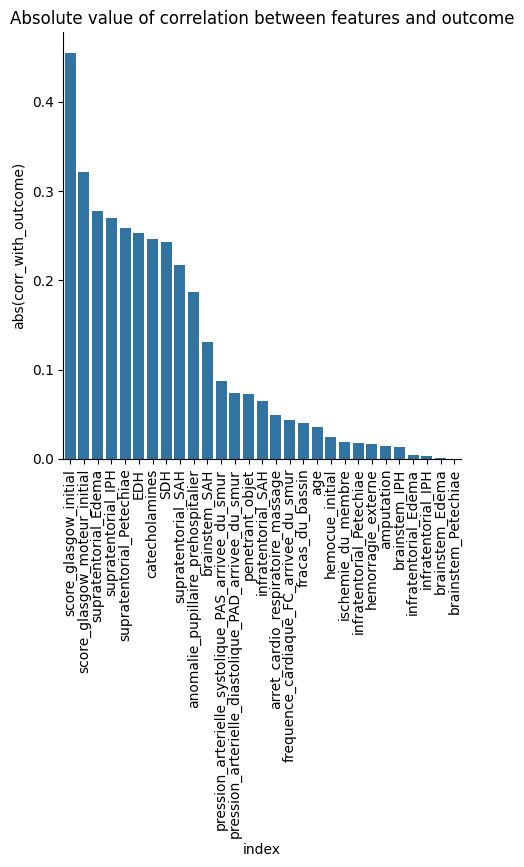

In [36]:
abs_value_corr_df = corr_with_outcome.reset_index().rename(columns={"outcome_neurochir_pic": "abs(corr_with_outcome)"}).drop([29])
abs_value_corr_df['abs(corr_with_outcome)'] = abs_value_corr_df['abs(corr_with_outcome)'].apply(np.abs)

g = sns.catplot(data=abs_value_corr_df.sort_values(by="abs(corr_with_outcome)", ascending=False), x='index', y='abs(corr_with_outcome)', kind="bar")
g.set_xticklabels(rotation=90)
g.set(title="Absolute value of correlation between features and outcome")


### t-SNE visualisation of the whole dataset

Text(0, 0.5, 't_SNE component 2')

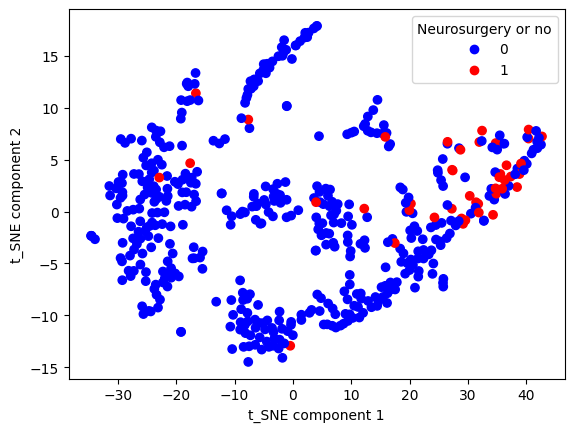

In [12]:
imp = SimpleImputer(missing_values=np.nan, strategy="median")
imp.fit(X_volumes_clinical)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(imp.transform(X_volumes_clinical))

fig, ax = plt.subplots()

scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y, cmap='bwr')
legend = ax.legend(*scatter.legend_elements(), title="Neurosurgery or no")
plt.xlabel('t_SNE component 1')
plt.ylabel('t_SNE component 2')

### Get rid of features too correlated with others (corr>0.5)
e.g glasgow motor (too correlated with glasgow), PAD (too correlated with PAS), infratentorial_IPH (highly correlated with infratentorial_Edema, brainstem_IPH & brainstem_Edema), Supra_Edema (too correlated with supra IPH), anomalie_pupille (too correlated with GOS)

Also brainstem_Petechiae is always null

In [13]:
redundant_features_clinical = ["score_glasgow_moteur_initial", "pression_arterielle_diastolique_PAD_arrivee_du_smur", "anomalie_pupillaire_prehospitalier"]
redundant_features_volume = ["infratentorial_IPH", "brainstem_Petechiae", "supratentorial_Edema"]

X_volumes_clinical_dropped = X_volumes_clinical.drop(redundant_features_clinical+redundant_features_volume, axis=1)
X_clinical_only_dropped = X_clinical_only.drop(redundant_features_clinical, axis=1)
X_volumes_only_dropped = X_volumes_only.drop(redundant_features_volume, axis=1)

In [14]:
X_volumes_clinical_dropped.head()

supratentorial_IPH  supratentorial_SAH  supratentorial_Petechiae  \
0                   0                 342                         0   
1                   0                   0                         0   
2                   0                 101                         0   
3                   0                 328                         0   
4                   0                   9                         0   

   infratentorial_SAH  infratentorial_Petechiae  infratentorial_Edema  \
0                  15                         0                     0   
1                   0                         0                     0   
2                   0                         0                     0   
3                   0                         0                     0   
4                   0                         0                     0   

   brainstem_IPH  brainstem_SAH  brainstem_Edema  SDH  ...  fracas_du_bassin  \
0              0              0                0   43  ...               0.0   
1              0              0                0  312  ...               0.0   
2              0              0                0   11  ...               0.0   
3              0              0                0  796  ...               0.0   
4              0              0                0  253  ...               0.0   

   catecholamines  pression_arterielle_systolique_PAS_arrivee_du_smur  \
0             0.0                                               87.0    
1             0.0                                              100.0    
2             0.0                                              101.0    
3             0.0                                              110.0    
4             0.0                                              114.0    

   score_glasgow_initial  frequence_cardiaque_FC_arrivee_du_smur  \
0                   15.0                                    56.0   
1                   15.0                                   100.0   
2                   14.0                                   120.0   
3                   15.0                                   107.0   
4                    NaN                                    83.0   

   arret_cardio_respiratoire_massage  penetrant_objet  ischemie_du_membre  \
0                                0.0              0.0                 0.0   
1                                0.0              0.0                 0.0   
2                                0.0              0.0                 0.0   
3                                0.0              0.0                 0.0   
4                                0.0              0.0                 0.0   

   hemorragie_externe  amputation  
0                 0.0         0.0  
1                 0.0         0.0  
2                 0.0         0.0  
3                 0.0         0.0  
4                 0.0         0.0  

[5 rows x 23 columns]

### Utility

In [15]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix

ftwo_scorer = make_scorer(fbeta_score, beta=2)

def confusion_matrix_scorer(clf, X, y):

     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)

     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

def false_neg_scorer(clf, X, y):

     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     
     return cm[1, 0]

def false_pos_scorer(clf, X, y):

     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     
     return cm[0, 1]

In [16]:
FOLDS = 5
N_REPEATS = 3
nb_total_samples = len(y)

### Image segmentation volumes and prehospital clinical data

#### Select 8 best features

In [1]:
X_volumes_clinical_dropped_imputed = X_volumes_clinical_dropped.fillna(X_volumes_clinical_dropped.median())


# f_classif uses ANOVA F-value (univariate feature selection, p.109 thèse Clément Brossard) BUT f-tests only capture linear dependencies (see https://scikit-learn.org/dev/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)
# apparently, mutual info classif is better when there is a mix of cat and non-cat variables with non-linear relationships.
select_k_best_classifier = SelectKBest(mutual_info_classif, k=8)
select_k_best_classifier.fit_transform(X_volumes_clinical_dropped_imputed, y) 

mask = select_k_best_classifier.get_support()
selected_features = X_volumes_clinical_dropped_imputed.columns[mask]

NameError: name 'X_volumes_clinical_dropped' is not defined

In [18]:
print("Selected 8 best features: ")
print(selected_features.values)

Selected 8 best features: 
['supratentorial_IPH' 'supratentorial_SAH' 'infratentorial_Petechiae'
 'infratentorial_Edema' 'SDH' 'fracas_du_bassin' 'score_glasgow_initial'
 'amputation']


Doesn't matter if we do oversampling before or after undersampling because they affect only the minority class and only the majority cass respectively

#### Logistic regression

In [19]:
clf = LogisticRegression()
scores = cross_validate(clf, X_volumes_clinical_dropped_imputed[selected_features], y, cv=5, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer})


print("Volumes and clinical data: Logistic regression without hyperparameter search")

roc_auc_metric = np.mean(scores["test_ROC_AUC"])
roc_auc_metric_std = np.std(scores["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(scores["test_F1"])
f1_score_std = np.std(scores["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(scores["test_F2"])
f2_score_std = np.std(scores["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(scores["test_Brier"])
brier_score_std = -np.std(scores["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(scores["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(scores["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(scores["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(scores["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


Volumes and clinical data: Logistic regression without hyperparameter search
AUC (max): 0.87 +- 0.09
F1 Score (max): 0.19 +- 0.1
F2 Score (max): 0.16 +- 0.1
Brier Score (min): 0.07 +- -0.01
False negative: 7% +- 1
False positive: 3% +- 2


/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

#### Random Forest Classifier

In [20]:
clf = RandomForestClassifier()
scores = cross_validate(clf, X_volumes_clinical_dropped_imputed[selected_features], y, cv=5, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer})


print("Volumes and clinical data: Random Forest Classifier without hyperparameter search")

roc_auc_metric = np.mean(scores["test_ROC_AUC"])
roc_auc_metric_std = np.std(scores["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(scores["test_F1"])
f1_score_std = np.std(scores["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(scores["test_F2"])
f2_score_std = np.std(scores["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(scores["test_Brier"])
brier_score_std = -np.std(scores["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(scores["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(scores["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(scores["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(scores["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


Volumes and clinical data: Random Forest Classifier without hyperparameter search
AUC (max): 0.88 +- 0.04
F1 Score (max): 0.36 +- 0.18
F2 Score (max): 0.31 +- 0.16
Brier Score (min): 0.06 +- -0.01
False negative: 6% +- 1
False positive: 2% +- 2


#### Gradient Boosting

In [21]:
clf = HistGradientBoostingClassifier()
scores = cross_validate(clf, X_volumes_clinical_dropped_imputed[selected_features], y, cv=5, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer})


print("Volumes and clinical data: Hist Gradient Boosting Classifier without hyperparameter search")

roc_auc_metric = np.mean(scores["test_ROC_AUC"])
roc_auc_metric_std = np.std(scores["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(scores["test_F1"])
f1_score_std = np.std(scores["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(scores["test_F2"])
f2_score_std = np.std(scores["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(scores["test_Brier"])
brier_score_std = -np.std(scores["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(scores["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(scores["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(scores["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(scores["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


Volumes and clinical data: Hist Gradient Boosting Classifier without hyperparameter search
AUC (max): 0.89 +- 0.03
F1 Score (max): 0.38 +- 0.21
F2 Score (max): 0.37 +- 0.19
Brier Score (min): 0.07 +- -0.01
False negative: 5% +- 2
False positive: 3% +- 2


#### Big Hyperparameter GridSearch with GradientBoosting

In [22]:
X_volumes_clinical_dropped_imputed[selected_features].head()

supratentorial_IPH  supratentorial_SAH  infratentorial_Petechiae  \
0                   0                 342                         0   
1                   0                   0                         0   
2                   0                 101                         0   
3                   0                 328                         0   
4                   0                   9                         0   

   infratentorial_Edema  SDH  fracas_du_bassin  score_glasgow_initial  \
0                     0   43               0.0                   15.0   
1                     0  312               0.0                   15.0   
2                     0   11               0.0                   14.0   
3                     0  796               0.0                   15.0   
4                     0  253               0.0                   15.0   

   amputation  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [24]:
pipeline_smote_under = Pipeline(steps=[('over', SMOTENC(categorical_features=["fracas_du_bassin", "amputation"])), 
                                        ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier())])


inner_cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=5, random_state=1)

p_grid = {"model__learning_rate": [0.01, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5, 1], "over__sampling_strategy": [0.1, 0.2, 0.3], "over__k_neighbors":[3,5,8], "under__sampling_strategy":[0.3, 0.5, 0.7]}
clf = GridSearchCV(estimator=pipeline_smote_under, param_grid=p_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=inner_cv)

outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

nested_scores_smote_undersampling = cross_validate(clf, X_volumes_clinical_dropped_imputed[selected_features], y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=outer_cv, n_jobs=-1)

print("Prehospital data & segmentation volumes: HistGradientBoostingClassifier with hyperparameter gridsearch")

roc_auc_metric = np.mean(nested_scores_smote_undersampling["test_ROC_AUC"])
roc_auc_metric_std = np.std(nested_scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(nested_scores_smote_undersampling["test_F1"])
f1_score_std = np.std(nested_scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(nested_scores_smote_undersampling["test_F2"])
f2_score_std = np.std(nested_scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(nested_scores_smote_undersampling["test_Brier"])
brier_score_std = -np.std(nested_scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/data_local/data_ssd/fehrdelt/envi

Prehospital data & segmentation volumes: HistGradientBoostingClassifier with hyperparameter gridsearch
AUC (max): 0.9 +- 0.04
F1 Score (max): 0.47 +- 0.09
F2 Score (max): 0.59 +- 0.12
Brier Score (min): 0.1 +- -0.02
False negative: 2% +- 1
False positive: 11% +- 3


/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/data_local/data_ssd/fehrdelt/envi

#### Feature Importance
https://scikit-learn.org/1.5/auto_examples/ensemble/plot_forest_importances.html 
Need to be computed on a test set

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

### Prehospital clinical data only

In [25]:
X_clinical_only_dropped_imputed = X_clinical_only_dropped.fillna(X_clinical_only_dropped.median())


# f_classif uses ANOVA F-value (univariate feature selection, p.109 thèse Clément Brossard) BUT f-tests only capture linear dependencies (see https://scikit-learn.org/dev/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)
# apparently, mutual info classif is better when there is a mix of cat and non-cat variables with non-linear relationships.
select_k_best_classifier = SelectKBest(mutual_info_classif, k=8)
select_k_best_classifier.fit_transform(X_clinical_only_dropped_imputed, y) 

mask = select_k_best_classifier.get_support()
selected_features = X_clinical_only_dropped_imputed.columns[mask]

In [26]:
print("Selected 8 best features: ")
print(selected_features.values)

Selected 8 best features: 
['fracas_du_bassin' 'catecholamines'
 'pression_arterielle_systolique_PAS_arrivee_du_smur'
 'score_glasgow_initial' 'penetrant_objet' 'ischemie_du_membre'
 'hemorragie_externe' 'amputation']


#### Logistic regression

#### Random Forest Classifier

#### Big Hyperparameter GridSearch with GradientBoosting

In [27]:
pipeline_smote_under = Pipeline(steps=[('over', SMOTENC(categorical_features=["catecholamines", "fracas_du_bassin", "penetrant_objet", "ischemie_du_membre", "hemorragie_externe", "amputation"])), 
                                        ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier())])


inner_cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=5, random_state=1)

p_grid = {"model__learning_rate": [0.01, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5, 1], "over__sampling_strategy": [0.1, 0.2, 0.3], "over__k_neighbors":[3,5,8], "under__sampling_strategy":[0.3, 0.5, 0.7]}
clf = GridSearchCV(estimator=pipeline_smote_under, param_grid=p_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=inner_cv)

outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

nested_scores_smote_undersampling = cross_validate(clf, X_clinical_only_dropped_imputed[selected_features], y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=outer_cv, n_jobs=-1)

print("Prehospital data only: HistGradientBoostingClassifier with hyperparameter gridsearch")

roc_auc_metric = np.mean(nested_scores_smote_undersampling["test_ROC_AUC"])
roc_auc_metric_std = np.std(nested_scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(nested_scores_smote_undersampling["test_F1"])
f1_score_std = np.std(nested_scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(nested_scores_smote_undersampling["test_F2"])
f2_score_std = np.std(nested_scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(nested_scores_smote_undersampling["test_Brier"])
brier_score_std = -np.std(nested_scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/data_local/data_ssd/fehrdelt/envi

Prehospital data only: HistGradientBoostingClassifier with hyperparameter gridsearch
AUC (max): 0.87 +- 0.06
F1 Score (max): 0.5 +- 0.08
F2 Score (max): 0.64 +- 0.1
Brier Score (min): 0.11 +- -0.01
False negative: 2% +- 1
False positive: 12% +- 3


### Image segmentation volumes data only

In [28]:
X_volumes_only_dropped_imputed = X_volumes_only_dropped.fillna(X_volumes_only_dropped.median())


# f_classif uses ANOVA F-value (univariate feature selection, p.109 thèse Clément Brossard) BUT f-tests only capture linear dependencies (see https://scikit-learn.org/dev/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)
# apparently, mutual info classif is better when there is a mix of cat and non-cat variables with non-linear relationships.
select_k_best_classifier = SelectKBest(mutual_info_classif, k=8)
select_k_best_classifier.fit_transform(X_volumes_only_dropped_imputed, y) 

mask = select_k_best_classifier.get_support()
selected_features = X_volumes_only_dropped_imputed.columns[mask]

In [29]:
print("Selected 8 best features: ")
print(selected_features.values)

Selected 8 best features: 
['supratentorial_IPH' 'supratentorial_SAH' 'supratentorial_Petechiae'
 'infratentorial_Petechiae' 'infratentorial_Edema' 'brainstem_Edema' 'SDH'
 'EDH']


#### Logistic regression

#### Random Forest Classifier

#### Big Hyperparameter GridSearch with GradientBoosting Classifier

In [30]:
pipeline_smote_under = Pipeline(steps=[('over', SMOTE()), 
                                        ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', HistGradientBoostingClassifier())])


inner_cv = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=5, random_state=1)

p_grid = {"model__learning_rate": [0.01, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5, 1], "over__sampling_strategy": [0.1, 0.2, 0.3], "over__k_neighbors":[3,5,8], "under__sampling_strategy":[0.3, 0.5, 0.7]}
clf = GridSearchCV(estimator=pipeline_smote_under, param_grid=p_grid, scoring={'F2':ftwo_scorer}, refit='F2', cv=inner_cv)

outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

nested_scores_smote_undersampling = cross_validate(clf, X_volumes_only_dropped_imputed[selected_features], y, scoring={'F2':ftwo_scorer, 'ROC_AUC':'roc_auc', 'Recall':'recall_macro', 'F1':'f1', 'Brier':"neg_brier_score", 'False_neg_scorer':false_neg_scorer, 'False_pos_scorer':false_pos_scorer}, cv=outer_cv, n_jobs=-1)

print("Volumes data only: HistGradientBoostingClassifier with hyperparameter gridsearch")

roc_auc_metric = np.mean(nested_scores_smote_undersampling["test_ROC_AUC"])
roc_auc_metric_std = np.std(nested_scores_smote_undersampling["test_ROC_AUC"])
print(f'AUC (max): {np.round(roc_auc_metric, 2)} +- {np.round(roc_auc_metric_std, 2)}')

f1_score = np.mean(nested_scores_smote_undersampling["test_F1"])
f1_score_std = np.std(nested_scores_smote_undersampling["test_F1"])
print(f'F1 Score (max): {np.round(f1_score, 2)} +- {np.round(f1_score_std, 2)}')

f2_score = np.mean(nested_scores_smote_undersampling["test_F2"])
f2_score_std = np.std(nested_scores_smote_undersampling["test_F2"])
print(f'F2 Score (max): {np.round(f2_score, 2)} +- {np.round(f2_score_std, 2)}')

brier_score = -np.mean(nested_scores_smote_undersampling["test_Brier"])
brier_score_std = -np.std(nested_scores_smote_undersampling["test_Brier"])
print(f'Brier Score (min): {np.round(brier_score, 2)} +- {np.round(brier_score_std, 2)}')

# test_False_neg_scorer returns the number of test false negatives -> to get a % we need to divide by the number of test samples*100
false_neg_score = np.mean(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
false_neg_score_std = np.std(nested_scores_smote_undersampling["test_False_neg_scorer"])*100/(nb_total_samples/FOLDS) 
print(f'False negative: {int(np.round(false_neg_score, 0))}% +- {int(np.round(false_neg_score_std, 0))}')

false_pos_score = np.mean(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
false_pos_score_std = np.std(nested_scores_smote_undersampling["test_False_pos_scorer"])*100/(nb_total_samples/FOLDS)
print(f'False positive: {int(np.round(false_pos_score, 0))}% +- {int(np.round(false_pos_score_std, 0))}')


/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/data_local/data_ssd/fehrdelt/envi

Volumes data only: HistGradientBoostingClassifier with hyperparameter gridsearch
AUC (max): 0.84 +- 0.07
F1 Score (max): 0.44 +- 0.08
F2 Score (max): 0.55 +- 0.1
Brier Score (min): 0.11 +- -0.03
False negative: 3% +- 1
False positive: 12% +- 4


/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data_local/data_ssd/fehrdelt/environments/general_env/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/data_local/data_ssd/fehrdelt/envi